In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import pycountry as pc
import matplotlib.ticker as mtick

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [2]:
hotel_bookings = pd.read_csv('data/hotel_bookings.csv')
hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
hotel_bookings.shape

(119390, 32)

In [4]:
for col in hotel_bookings:
    print(col)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [5]:
hotel_bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel_bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
# copy dataset 
df = hotel_bookings.copy()

## Preprocessing

In [9]:
# Find if there are any Missing Values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There are three columns with missing values: 1) company, 2) agent, 3) country, 4) children. Of the three company has the most missing values almost 94.30% are missing, agent has 13.69% missing and country 0.41% missing. __NOTE:__We will drop the company and agent columns but we will keep the country column because this is part of the question we want to ask later. For the children column we will fill with 0.

In [10]:
# Drop company column
df = df.drop(['company'], axis=1)

In [11]:
# Drop agent column
df = df.drop(['agent'], axis=1)

In [12]:
# We are assuming that those who did not have data for children don't have children
df['children'] = df['children'].fillna(0)

## Analyze variables (columns) and remove unnecessary variables (columns)

In [13]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [14]:
# Change values for Resort Hotel and City Hotel to numerical
df['hotel'] = df['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

In [15]:
# Change values for Months to numerical
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [16]:
# Looking at the reservation_status column
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [17]:
df.reservation_status.nunique()

3

In [18]:
# Check the number of responses in the reservation_status column
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [19]:
# Check the number of responses in the is_canceled column
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

__NOTE:__ The columns is_canceled and reservation_status are virtually identical, this will result in almost 100% prediction but this will be misleading __so__ we will drop the 'reservation_status' column.

In [20]:
# Drop 'reservation_status' column
df = df.drop(['reservation_status'], axis=1)

In [21]:
# Drop 'reservation_status_date' column
df = df.drop(['reservation_status_date'], axis=1)

In [22]:
# Delete the NA rows of country column
indices = df.loc[pd.isna(df["country"]), :].index 
df = df.drop(df.index[indices])   
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [23]:
# Look at correlation to see which data has a relationship with cancelation
df.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,0.133990,0.071842,0.033724,0.001231,0.000739,-0.002129,-0.189729,-0.237767,-0.017754,-0.045420,-0.043670,-0.051353,-0.012334,0.000745,-0.073166,0.072011,0.093117,-0.217408,-0.043983
is_canceled,0.133990,1.000000,0.291940,0.016339,0.010325,0.007481,-0.006173,-0.002639,0.024103,0.058408,0.004740,-0.032523,-0.085185,0.109914,-0.055495,-0.144669,0.054008,0.046133,-0.194801,-0.235595
lead_time,0.071842,0.291940,1.000000,0.039974,0.131236,0.126724,0.002354,0.083988,0.164783,0.116773,-0.038326,-0.021146,-0.125084,0.085962,-0.071124,0.000014,0.170008,-0.066332,-0.115551,-0.096560
arrival_date_year,0.033724,0.016339,0.039974,1.000000,-0.527603,-0.540488,-0.000531,0.021678,0.031759,0.029107,0.054504,-0.013178,0.010137,-0.119911,0.029804,0.031141,-0.056813,0.197919,-0.012646,0.108873
arrival_date_month,0.001231,0.010325,0.131236,-0.527603,1.000000,0.995094,-0.026152,0.017801,0.018585,0.027995,0.005400,0.009834,-0.031009,0.037337,-0.021509,0.004465,0.019088,0.078780,0.000106,0.027651
arrival_date_week_number,0.000739,0.007481,0.126724,-0.540488,0.995094,1.000000,0.066824,0.017640,0.015006,0.025402,0.005490,0.010038,-0.030414,0.035366,-0.020769,0.005183,0.022992,0.075256,0.001714,0.025788
arrival_date_day_of_month,-0.002129,-0.006173,0.002354,-0.000531,-0.026152,0.066824,1.000000,-0.015903,-0.027589,-0.001864,0.014571,-0.000536,-0.006334,-0.027009,0.000121,0.010779,0.022741,0.029980,0.008271,0.003050
stays_in_weekend_nights,-0.189729,-0.002639,0.083988,0.021678,0.017801,0.017640,-0.015903,1.000000,0.494890,0.090392,0.045431,0.018397,-0.087833,-0.013007,-0.040596,0.062402,-0.054566,0.047319,-0.018145,0.071654
stays_in_week_nights,-0.237767,0.024103,0.164783,0.031759,0.018585,0.015006,-0.027589,0.494890,1.000000,0.091991,0.044260,0.020157,-0.097992,-0.014273,-0.047366,0.095664,-0.002160,0.063647,-0.024376,0.066778
adults,-0.017754,0.058408,0.116773,0.029107,0.027995,0.025402,-0.001864,0.090392,0.091991,1.000000,0.029584,0.017884,-0.147496,-0.006976,-0.105028,-0.052427,-0.008768,0.227431,0.016364,0.121844


In [24]:
df.corr()['is_canceled'].sort_values()

total_of_special_requests        -0.235595
required_car_parking_spaces      -0.194801
booking_changes                  -0.144669
is_repeated_guest                -0.085185
previous_bookings_not_canceled   -0.055495
babies                           -0.032523
arrival_date_day_of_month        -0.006173
stays_in_weekend_nights          -0.002639
children                          0.004740
arrival_date_week_number          0.007481
arrival_date_month                0.010325
arrival_date_year                 0.016339
stays_in_week_nights              0.024103
adr                               0.046133
days_in_waiting_list              0.054008
adults                            0.058408
previous_cancellations            0.109914
hotel                             0.133990
lead_time                         0.291940
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [25]:
# OneHotEncoding
df = pd.get_dummies(data = df, columns = ['meal', 'market_segment', 'deposit_type', 'distribution_channel', 'country',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type'])

## Baseline Decision Tree Model

In [26]:
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [27]:
baseline = DecisionTreeClassifier(max_depth = 12)

In [28]:
baseline_model = baseline.fit(X_train, y_train)

In [29]:
y_pred = baseline_model.predict(X_test)

In [30]:
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Decision Tree Model
Accuracy Score: 0.8441030529001149

Confusion Matrix:
 [[19945  2408]
 [ 3153 10165]]

AUC Score: 0.8277633541759173


Text(0.5, 0, 'Decision Tree Model\n Feature Importance (%)')

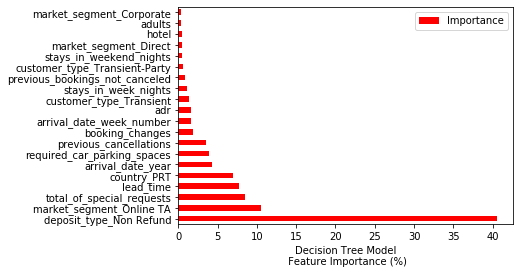

In [31]:
pd.DataFrame(data = baseline_model.feature_importances_*100,
                   columns = ["Importance"],
                   index = X_train.columns).sort_values("Importance", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Decision Tree Model\n Feature Importance (%)")

In [32]:
# Define a function for the different models
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))

In [33]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.813013372207115

Confusion Matrix:
 [[20389  1964]
 [ 4706  8612]]


In [34]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8858456449216451

Confusion Matrix:
 [[21030  1323]
 [ 2749 10569]]


Text(0.5, 0, 'Random Forest\n Feature Importance (%)')

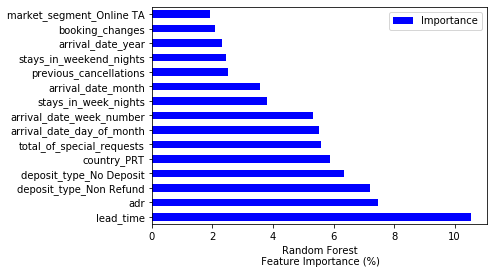

In [35]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importance"],
                   index = X_train.columns).sort_values("Importance", ascending = False)[:15].plot(kind = "barh", color = "blue")

plt.xlabel("Random Forest\n Feature Importance (%)")

In [36]:
print('Model: ADA Boost\n')
model(EasyEnsembleClassifier(), X_train, X_test, y_train, y_test)

Model: ADA Boost

Accuracy Score: 0.8269462588657452

Confusion Matrix:
 [[18952  3401]
 [ 2772 10546]]


In [37]:
ADABoost = EasyEnsembleClassifier()
ADA_model1 = ADABoost.fit(X_train, y_train)

pd.DataFrame(data = ADABoost.feature_importances_*100,
                   columns = ["Importance"],
                   index = X_train.columns).sort_values("Importance", ascending = False)[:15].plot(kind = "barh", color = "green")

plt.xlabel("Feature Importance (%)")

AttributeError: 'EasyEnsembleClassifier' object has no attribute 'feature_importances_'